

# **Data Preprocessing**

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
path= '/content/drive/MyDrive/Colab Notebooks/Deep Learning Model/Sales.csv'
path1= '/content/drive/MyDrive/geography.csv'
path2= '/content/drive/MyDrive/product.csv'

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(path)
df_geo = pd.read_csv(path1)
df_product=pd.read_csv(path2)


In [166]:
df.info()
df_geo.info()
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976243 entries, 0 to 976242
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ProductID  976243 non-null  int64 
 1   Date       976243 non-null  object
 2   Zip        976243 non-null  int64 
 3   Units      976243 non-null  int64 
 4   Revenue    976202 non-null  object
 5   COGS       976243 non-null  object
dtypes: int64(3), object(3)
memory usage: 44.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39948 entries, 0 to 39947
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Zip       39948 non-null  int64 
 1   City      39948 non-null  object
 2   State     39948 non-null  object
 3   Region    39948 non-null  object
 4   District  39948 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 4

In [167]:
df["Date"] = pd.to_datetime(df["Date"])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['COGS'] = df['COGS'].astype(str)
df['COGS'] = (df['COGS']
    .str.replace('$', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

df['Revenue']  = (df['Revenue']
    .str.replace('$', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

df = df.sort_values(by="Date")


In [168]:
df

,ProductID,Date,Zip,Units,Revenue,COGS,Year,Month,Day
147011,676,2010-07-04,8075,1,10048.50,9342.09,2010,7,4
330167,1041,2010-07-04,56334,1,11651.85,5941.28,2010,7,4
362065,1318,2010-07-04,92675,1,3873.24,1991.62,2010,7,4
189287,580,2010-07-04,54547,1,9418.50,10174.81,2010,7,4
446302,1895,2010-07-04,92354,1,9134.37,9209.27,2010,7,4
...,...,...,...,...,...,...,...,...,...
201907,2269,2022-07-01,21012,1,4718.70,4511.55,2022,7,1
324302,668,2022-07-01,37129,1,16946.37,12831.79,2022,7,1
465416,2224,2022-07-01,84414,1,970.20,559.81,2022,7,1
823105,2393,2022-07-01,60449,1,1259.37,1371.71,2022,7,1


In [169]:
missing_values = df.isnull().sum()
print("Số lượng giá trị null trong từng cột:")
print(missing_values)

Số lượng giá trị null trong từng cột:
ProductID     0
Date          0
Zip           0
Units         0
Revenue      41
COGS          0
Year          0
Month         0
Day           0
dtype: int64


In [170]:
df[df['Revenue'].isnull()]


,ProductID,Date,Zip,Units,Revenue,COGS,Year,Month,Day
333237,912,2022-06-07,68521,1,NaN,0.0,2022,6,7
337461,720,2022-06-14,29063,1,NaN,0.0,2022,6,14
336181,2266,2022-06-14,89135,1,NaN,0.0,2022,6,14
338503,2267,2022-06-14,89135,1,NaN,0.0,2022,6,14
333994,719,2022-06-14,29063,1,NaN,0.0,2022,6,14
333533,1542,2022-06-17,92086,1,NaN,0.0,2022,6,17
338489,2302,2022-06-17,92128,1,NaN,0.0,2022,6,17
336177,1541,2022-06-17,92086,1,NaN,0.0,2022,6,17
333052,2302,2022-06-17,89044,1,NaN,0.0,2022,6,17
337767,2302,2022-06-19,85303,1,NaN,0.0,2022,6,19


In [171]:
df_cleaned = df.dropna(subset=['Revenue'])



In [172]:
df=df_cleaned

In [173]:
df

,ProductID,Date,Zip,Units,Revenue,COGS,Year,Month,Day
147011,676,2010-07-04,8075,1,10048.50,9342.09,2010,7,4
330167,1041,2010-07-04,56334,1,11651.85,5941.28,2010,7,4
362065,1318,2010-07-04,92675,1,3873.24,1991.62,2010,7,4
189287,580,2010-07-04,54547,1,9418.50,10174.81,2010,7,4
446302,1895,2010-07-04,92354,1,9134.37,9209.27,2010,7,4
...,...,...,...,...,...,...,...,...,...
201907,2269,2022-07-01,21012,1,4718.70,4511.55,2022,7,1
324302,668,2022-07-01,37129,1,16946.37,12831.79,2022,7,1
465416,2224,2022-07-01,84414,1,970.20,559.81,2022,7,1
823105,2393,2022-07-01,60449,1,1259.37,1371.71,2022,7,1


In [174]:
# Nhóm doanh thu theo tháng
df['Year-Month'] = df['Date'].dt.to_period('M')
df_monthly_revenue = df.groupby('Year-Month')['Revenue'].sum().reset_index()

# Chuyển Year-Month về datetime để vẽ biểu đồ
df_monthly_revenue['Year-Month'] = df_monthly_revenue['Year-Month'].astype(str)
df_monthly_revenue['Year-Month'] = pd.to_datetime(df_monthly_revenue['Year-Month'])

# Tính sự khác biệt doanh thu giữa các tháng
df_monthly_revenue['diff'] = df_monthly_revenue['Revenue'].diff()


<ipython-input-174-8fa670ea73cc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# **EDA**

In [175]:
import plotly.graph_objs as go
import plotly.offline as pyoff
import matplotlib.pyplot as plt
import seaborn as sns


In [176]:
df['Profit'] = df['Revenue'] - df['COGS']

<ipython-input-176-24aef6e7bfb0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
full_df = df.merge(df_product, on='ProductID', how='left')
full_df = full_df.merge(df_geo, on='Zip', how='left')
full_df['District'] = full_df['District'].astype(str).str[:2]
full_df['Year'] = full_df['Date'].dt.year
full_df['Month'] = full_df['Date'].dt.month

seg_cat_year = full_df.groupby(['Year', 'Segment', 'Category']).agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units': 'sum'
}).reset_index()

print("\nTổng hợp Revenue và Profit theo Year - Segment - Category:")
print(seg_cat_year.head(15))



Tổng hợp Revenue và Profit theo Year - Segment - Category:
    Year       Segment Category       Revenue       Profit  Units
0   2010    All Season      Mix  3.279820e+06    477176.74    813
1   2010   Convenience    Urban  7.820872e+07  16245922.57  11039
2   2010       Extreme    Urban  2.191555e+07   3124043.88   3876
3   2010    Moderation    Urban  5.519724e+07   9417894.30   5029
4   2010  Productivity    Rural  3.857243e+07   8004113.09  22764
5   2010       Regular    Urban  3.409100e+06    763237.25    785
6   2010        Select    Rural  7.184241e+06   1071994.20   2361
7   2010         Youth    Youth  2.669358e+06    533624.59   1757
8   2011    All Season      Mix  8.337038e+06   1234178.15   2032
9   2011   Convenience    Urban  2.023497e+08  40878060.07  29161
10  2011       Extreme    Urban  6.715094e+07  10742065.39  12001
11  2011    Moderation    Urban  1.254125e+08  19672831.91  11427
12  2011  Productivity    Rural  8.506944e+07  16213522.49  48242
13  2011       R

##1.Biểu đồ doanh thu và lợi nhuận cho thấy sự phân hóa rõ rệt giữa hai nhóm

*   Nhóm dẫn đầu: Moderation và Convenience chiếm ưu thế.
*   Nhóm còn lại: Extreme, All season, Productivity, Regular, Select, Youth có mức doanh thu và lợi nhuận thấp hơn đáng kể.


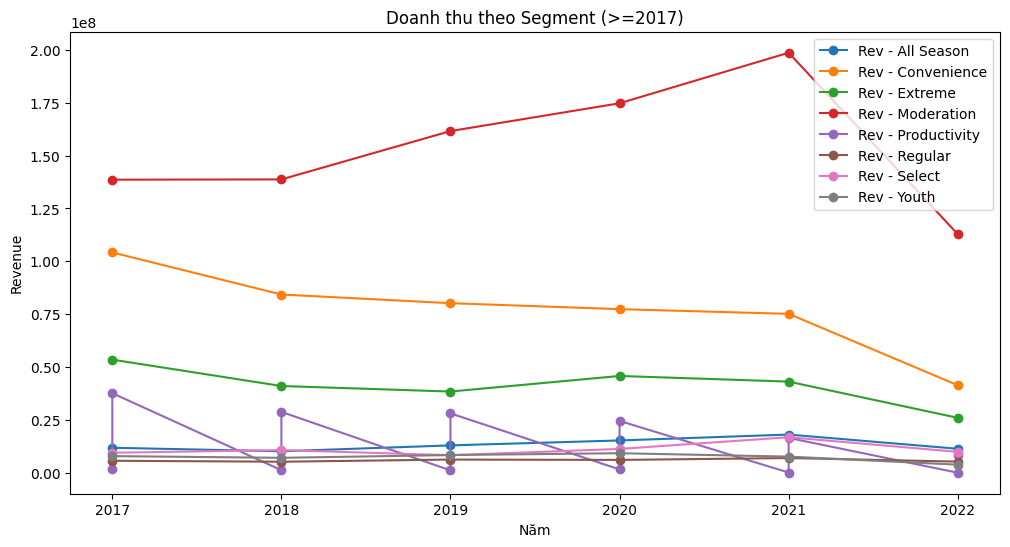

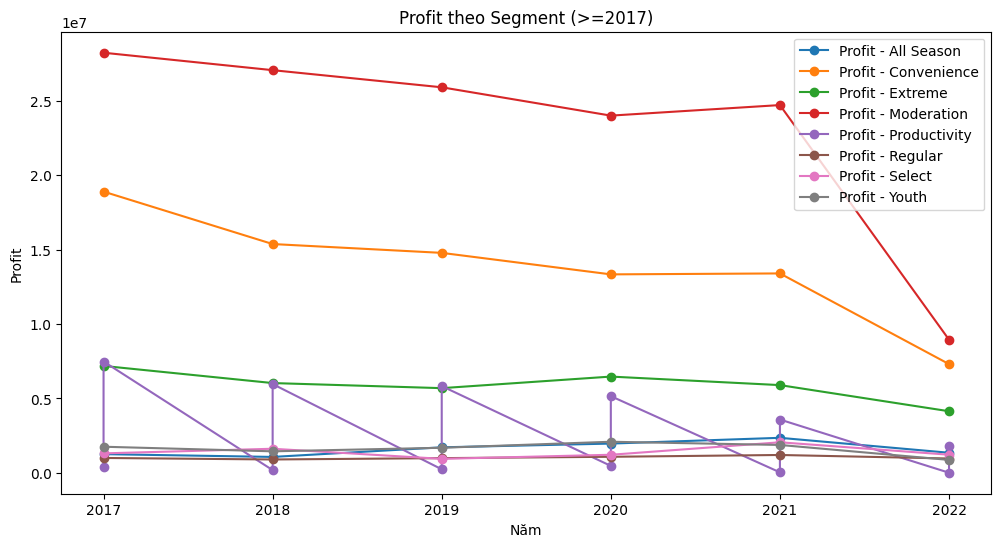

In [178]:
# Vẽ biểu đồ đường cho từng Segment/Category để so sánh trước và sau 2017
# Lọc dữ liệu sau 2017
seg_cat_post2017 = seg_cat_year[seg_cat_year['Year'] >= 2017]

# Vẽ biểu đồ cho từng phân nhóm (chỉ lấy ví dụ cho một vài phân khúc)
plt.figure(figsize=(12,6))
for seg in seg_cat_post2017['Segment'].unique():
    subset = seg_cat_post2017[seg_cat_post2017['Segment'] == seg]
    plt.plot(subset['Year'], subset['Revenue'], marker='o', label=f'Rev - {seg}')
plt.title("Doanh thu theo Segment (>=2017)")
plt.xlabel("Năm")
plt.ylabel("Revenue")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
for seg in seg_cat_post2017['Segment'].unique():
    subset = seg_cat_post2017[seg_cat_post2017['Segment'] == seg]
    plt.plot(subset['Year'], subset['Profit'], marker='o', label=f'Profit - {seg}')
plt.title("Profit theo Segment (>=2017)")
plt.xlabel("Năm")
plt.ylabel("Profit")
plt.legend()
plt.show()


Tổng hợp cho các Category: youth, rural, urban:
    Year Category       Revenue       Profit  Units
0   2010    Rural  4.575667e+07   9076107.29  25125
1   2010    Urban  1.587306e+08  29551098.00  20729
2   2010    Youth  2.669358e+06    533624.59   1757
3   2011    Rural  1.002703e+08  18778290.57  53268
4   2011    Urban  4.033813e+08  73147985.05  54398
5   2011    Youth  7.912954e+06   1662513.90   4481
6   2012    Rural  1.036868e+08  20098823.86  52219
7   2012    Urban  4.290307e+08  76783132.59  58311
8   2012    Youth  8.644590e+06   1820854.40   4656
9   2013    Rural  1.038068e+08  22251575.74  48977
10  2013    Urban  4.674669e+08  82680613.43  62747
11  2013    Youth  1.117675e+07   2553816.13   5517
12  2014    Rural  9.718355e+07  20113918.60  42569
13  2014    Urban  5.121567e+08  85449629.47  66692
14  2014    Youth  1.198104e+07   2699444.03   5291
15  2015    Rural  9.197124e+07  18124764.01  36528
16  2015    Urban  4.926893e+08  86874052.57  63503
17  2015    You

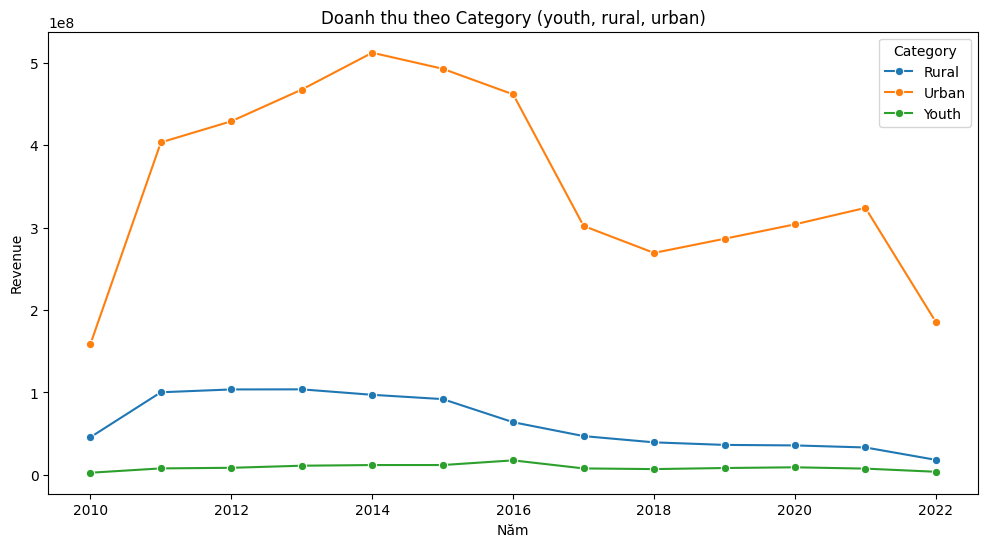

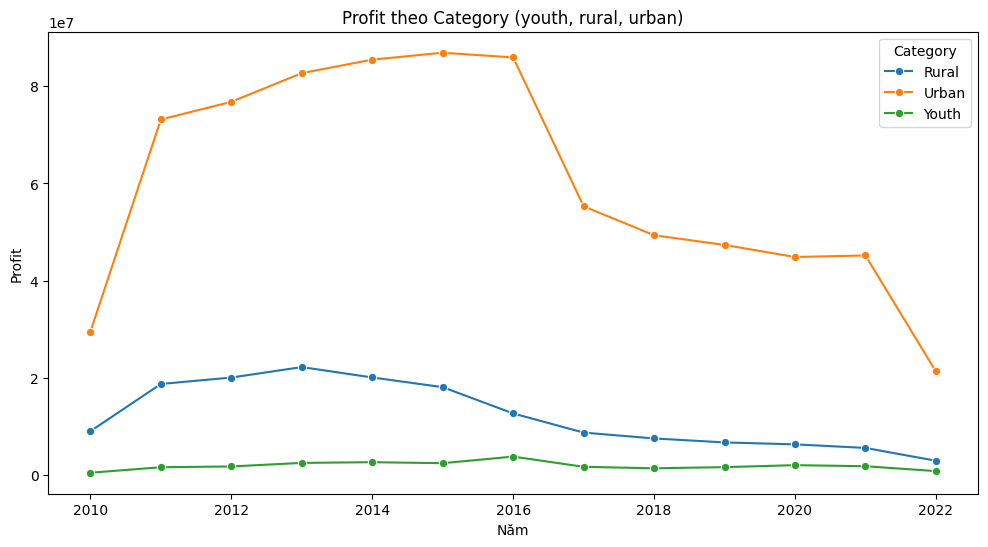

In [179]:
# 2.3. So sánh các nhóm "youth", "rural", "urban"
if full_df['Category'].str.lower().isin(['youth', 'rural', 'urban']).any():
    specific_cat = full_df[full_df['Category'].str.lower().isin(['youth', 'rural', 'urban'])]
    specific_summary = specific_cat.groupby(['Year', 'Category']).agg({
        'Revenue': 'sum',
        'Profit': 'sum',
        'Units': 'sum'
    }).reset_index()
    print("\nTổng hợp cho các Category: youth, rural, urban:")
    print(specific_summary)

    plt.figure(figsize=(12,6))
    sns.lineplot(data=specific_summary, x='Year', y='Revenue', hue='Category', marker='o')
    plt.title("Doanh thu theo Category (youth, rural, urban)")
    plt.xlabel("Năm")
    plt.ylabel("Revenue")
    plt.show()

    plt.figure(figsize=(12,6))
    sns.lineplot(data=specific_summary, x='Year', y='Profit', hue='Category', marker='o')
    plt.title("Profit theo Category (youth, rural, urban)")
    plt.xlabel("Năm")
    plt.ylabel("Profit")
    plt.show()

##2.Phân tích sản phẩm biến mất / suy giảm hiệu suất đột ngột

In [180]:
# PHẦN 3: PHÂN TÍCH SẢN PHẨM BIẾN MẤT / GIẢM HIỆU SUẤT ĐỘT NGỘT
# Tính số lượng giao dịch (hoặc số lần bán) của từng sản phẩm theo năm
product_year = full_df.groupby(['Year', 'ProductID']).agg({
    'Units': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

# Tìm những sản phẩm có số lượng giao dịch giảm đột ngột sau 2017 so với trước đó
# Tính trung bình Units của từng sản phẩm trước 2017 và sau 2017
pre2017 = product_year[product_year['Year'] < 2017].groupby('ProductID')['Units'].mean().reset_index().rename(columns={'Units': 'Units_pre2017'})
post2017 = product_year[product_year['Year'] >= 2017].groupby('ProductID')['Units'].mean().reset_index().rename(columns={'Units': 'Units_post2017'})
prod_compare = pd.merge(pre2017, post2017, on='ProductID', how='inner')

# Tính tỉ lệ giảm của Units (nếu giảm > 50% thì đánh dấu là giảm mạnh)
prod_compare['Reduction_Rate'] = (prod_compare['Units_pre2017'] - prod_compare['Units_post2017']) / prod_compare['Units_pre2017']
print("\nSản phẩm có sự giảm số lượng bán (Units) > 50%:")
print(prod_compare[prod_compare['Reduction_Rate'] > 0.5])


Sản phẩm có sự giảm số lượng bán (Units) > 50%:
     ProductID  Units_pre2017  Units_post2017  Reduction_Rate
6           38      28.500000        1.666667        0.941520
7           40       7.000000        2.000000        0.714286
8           42       6.000000        2.000000        0.666667
9           89      12.000000        1.000000        0.916667
10          92      82.571429        1.000000        0.987889
..         ...            ...             ...             ...
746       2400     204.285714        1.000000        0.995105
747       2402     174.800000       36.000000        0.794050
748       2404      52.500000        2.500000        0.952381
750       2407      11.500000        3.000000        0.739130
752       2412     264.500000       75.333333        0.715186

[577 rows x 4 columns]


3.Phân tích COGS và cấu trúc giá


So sánh Revenue và COGS theo Năm:
    Year       Revenue          COGS  Cost_to_Revenue
0   2010  2.104365e+08  1.707985e+08         0.811639
1   2011  5.199015e+08  4.250786e+08         0.817614
2   2012  5.508145e+08  4.510869e+08         0.818945
3   2013  5.942496e+08  4.856279e+08         0.817212
4   2014  6.356110e+08  5.260177e+08         0.827578
5   2015  6.124530e+08  5.036523e+08         0.822352
6   2016  5.640998e+08  4.593387e+08         0.814286
7   2017  3.704278e+08  3.029221e+08         0.817763
8   2018  3.272709e+08  2.676449e+08         0.817809
9   2019  3.453526e+08  2.875985e+08         0.832768
10  2020  3.659085e+08  3.101526e+08         0.847623
11  2021  3.830445e+08  3.279625e+08         0.856199
12  2022  2.189537e+08  1.923882e+08         0.878671


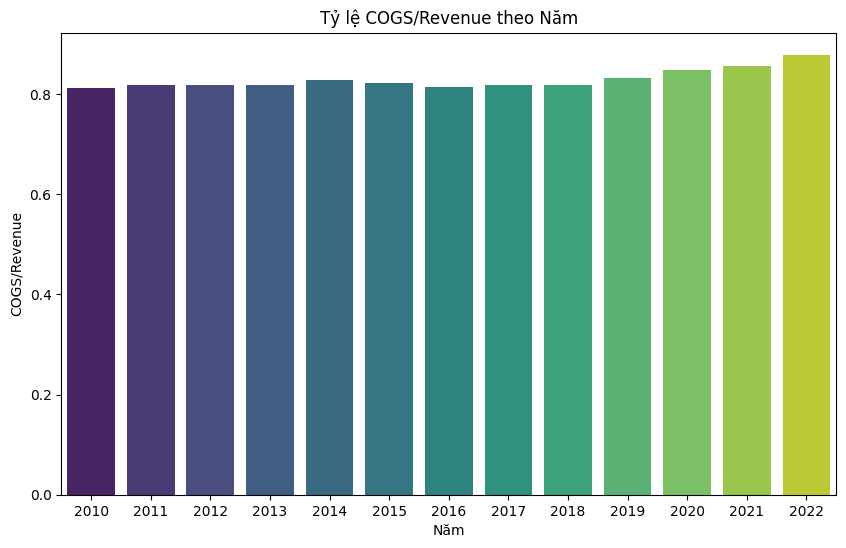

In [181]:
# PHẦN 4: PHÂN TÍCH COGS VÀ CẤU TRÚC GIÁ
# Tổng hợp doanh thu và COGS theo năm
yearly_cost = full_df.groupby('Year').agg({
    'Revenue': 'sum',
    'COGS': 'sum'
}).reset_index()

yearly_cost['Cost_to_Revenue'] = yearly_cost['COGS'] / yearly_cost['Revenue']
print("\nSo sánh Revenue và COGS theo Năm:")
print(yearly_cost)

plt.figure(figsize=(10,6))
sns.barplot(data=yearly_cost, x='Year', y='Cost_to_Revenue', palette="viridis")
plt.title("Tỷ lệ COGS/Revenue theo Năm")
plt.xlabel("Năm")
plt.ylabel("COGS/Revenue")
plt.show()

## 3.Phân cụm các sản phẩm dựa trên mối quan hệ giữa Tổng doanh thu và Tổng lợi nhuận


Kết quả clustering sản phẩm:
   ProductID  Units      Revenue     Profit  Cluster
0          1     64    316512.00  141607.68        2
1          3    971  10517267.25 -827706.85        2
2          4    207   1989426.60  829391.25        2
3          5      2     17892.00    -710.32        2
4          7     36    191051.91   63830.33        2


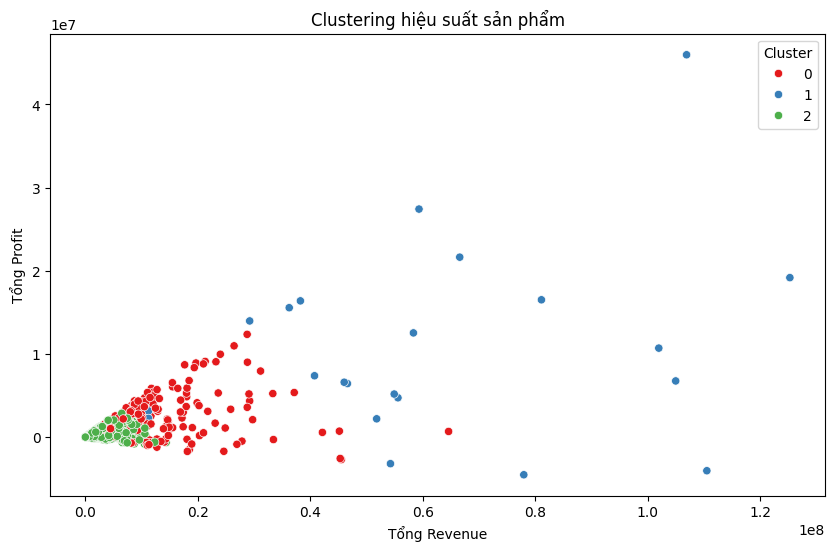

In [182]:
from sklearn.cluster import KMeans # Importing the KMeans class from sklearn.cluster

# PHẦN 5: PHÂN TÍCH SỐ LƯỢNG BÁN RA (Units) & CLUSTERING
# -----------------------------
# Tóm tắt hiệu suất bán hàng theo sản phẩm
prod_perf = full_df.groupby('ProductID').agg({
    'Units': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

from sklearn.preprocessing import StandardScaler
# Chuẩn hóa dữ liệu để clustering
scaler = StandardScaler()
features = prod_perf[['Units', 'Revenue', 'Profit']]
features_scaled = scaler.fit_transform(features)

# Sử dụng KMeans để phân nhóm sản phẩm (ví dụ 3 cluster)
kmeans = KMeans(n_clusters=3, random_state=42)
prod_perf['Cluster'] = kmeans.fit_predict(features_scaled)

print("\nKết quả clustering sản phẩm:")
print(prod_perf.head())

plt.figure(figsize=(10,6))
sns.scatterplot(data=prod_perf, x='Revenue', y='Profit', hue='Cluster', palette='Set1')
plt.title("Clustering hiệu suất sản phẩm")
plt.xlabel("Tổng Revenue")
plt.ylabel("Tổng Profit")
plt.show()

##4.Ảnh hưởng của khu vực đến doanh thu: Doanh số tại CA tác động đáng kể đến tổng doanh thu.

In [183]:
df = df.merge(df_geo[['Zip', 'State']], on='Zip', how='left')

num_states = df['State'].nunique()
print(f"Số lượng bang trong dữ liệu: {num_states}")

# Danh sách các bang
states_list = df['State'].unique()
print("Danh sách các bang:", states_list)


Số lượng bang trong dữ liệu: 49
Danh sách các bang: ['NJ' 'MN' 'CA' 'WI' 'OH' 'IL' 'KS' 'PA' 'AL' 'IA' 'TX' 'VA' 'WV' 'AZ'
 'RI' 'AR' 'WA' 'MO' 'GA' 'IN' 'NY' 'MI' 'MA' 'VT' 'FL' 'DC' 'NV' 'SC'
 'AK' 'DE' 'LA' 'NM' 'NC' 'CO' 'UT' 'KY' 'OK' 'TN' 'SD' 'CT' 'OR' 'ND'
 'MS' 'WY' 'MD' 'ID' 'NE' 'MT' 'NH']


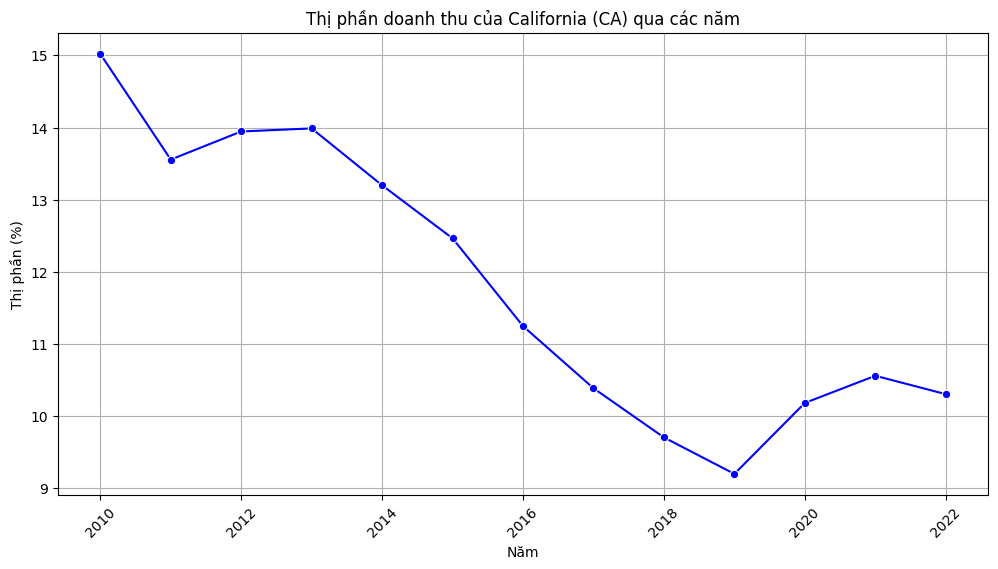

In [184]:
# Tính tổng doanh thu mỗi năm
df_yearly = df.groupby("Year")["Revenue"].sum().reset_index().rename(columns={"Revenue": "Total_Revenue"})

# Tính tổng doanh thu của bang CA theo từng năm
df_ca_yearly = df[df["State"] == "CA"].groupby("Year")["Revenue"].sum().reset_index().rename(columns={"Revenue": "CA_Revenue"})

# Kết hợp hai bảng để tính thị phần
df_ca_market_share = df_ca_yearly.merge(df_yearly, on="Year")
df_ca_market_share["Market_Share"] = df_ca_market_share["CA_Revenue"] / df_ca_market_share["Total_Revenue"] * 100

# Vẽ biểu đồ thị phần
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_ca_market_share, x="Year", y="Market_Share", marker="o", color="blue")

# Tùy chỉnh biểu đồ
plt.title("Thị phần doanh thu của California (CA) qua các năm")
plt.xlabel("Năm")
plt.ylabel("Thị phần (%)")
plt.xticks(rotation=45)
plt.grid()

# Hiển thị biểu đồ
plt.show()

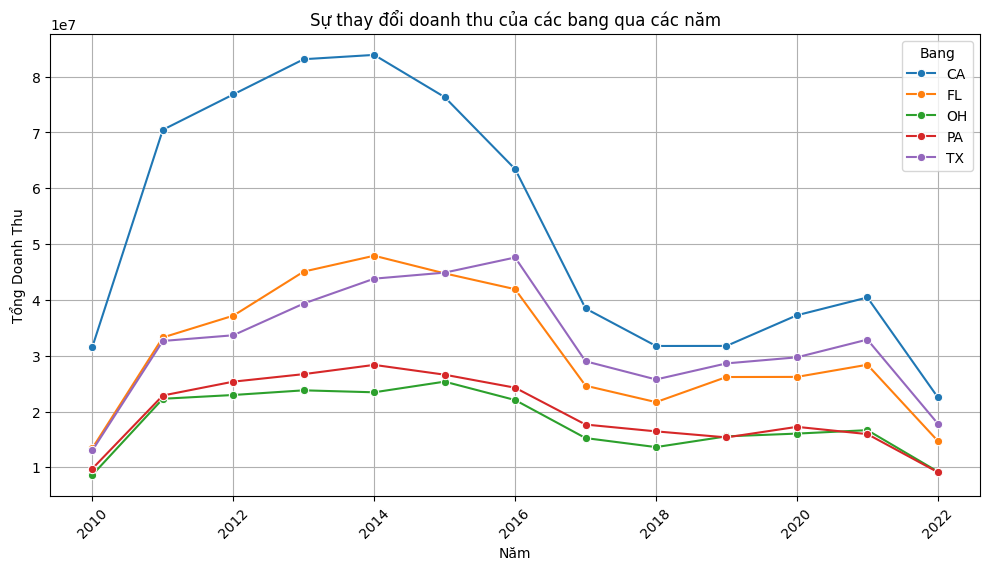

In [185]:
# Nhóm dữ liệu theo State và Year, tính tổng doanh thu
df_state_yearly = df.groupby(["State", "Year"])["Revenue"].sum().reset_index()

# Chọn một số bang có doanh thu cao nhất để vẽ (ví dụ: top 5)
top_states = df_state_yearly.groupby("State")["Revenue"].sum().nlargest(5).index

# Lọc dữ liệu chỉ lấy các bang nằm trong top 5
df_top_states = df_state_yearly[df_state_yearly["State"].isin(top_states)]

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_states, x="Year", y="Revenue", hue="State", marker="o", palette="tab10")

# Tùy chỉnh biểu đồ
plt.title("Sự thay đổi doanh thu của các bang qua các năm")
plt.xlabel("Năm")
plt.ylabel("Tổng Doanh Thu")
plt.xticks(rotation=45)  # Xoay nhãn năm cho dễ đọc
plt.legend(title="Bang")
plt.grid()

# Hiển thị biểu đồ
plt.show()


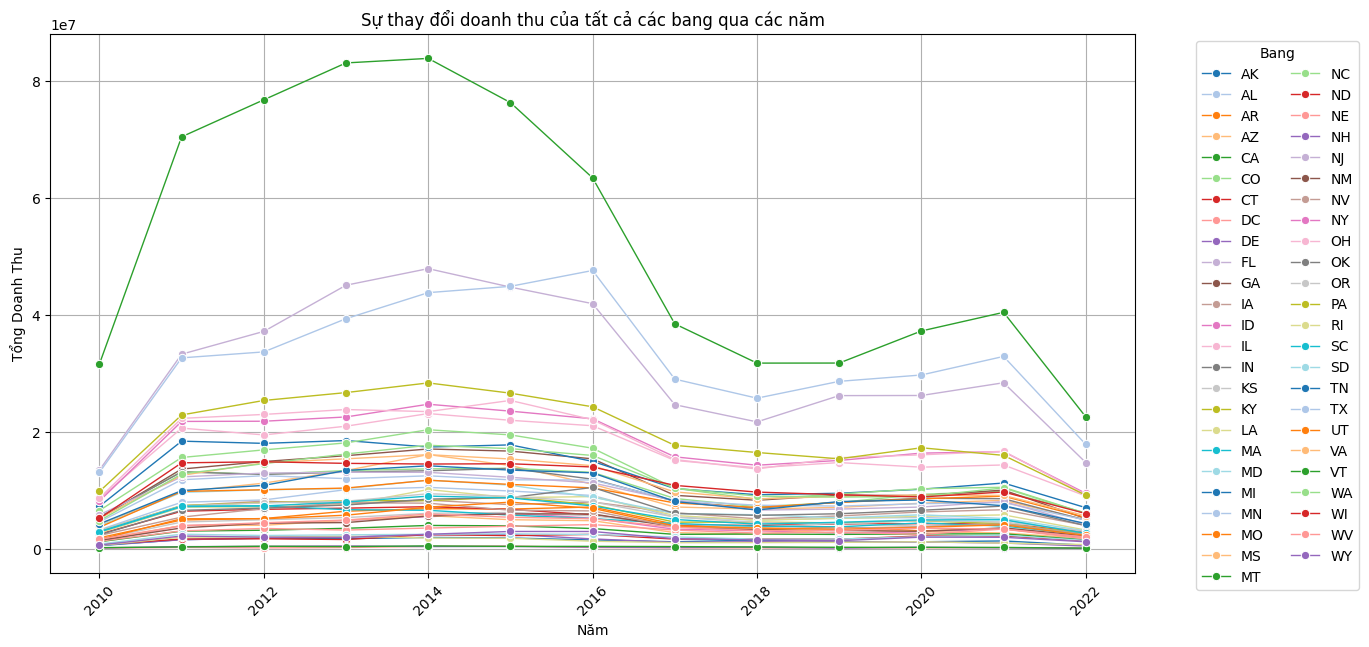

In [186]:
# Nhóm dữ liệu theo State và Year, tính tổng doanh thu
df_state_yearly = df.groupby(["State", "Year"])["Revenue"].sum().reset_index()

# Vẽ biểu đồ đường cho tất cả các bang
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_state_yearly, x="Year", y="Revenue", hue="State", marker="o", palette="tab20", linewidth=1)

# Tùy chỉnh biểu đồ
plt.title("Sự thay đổi doanh thu của tất cả các bang qua các năm")
plt.xlabel("Năm")
plt.ylabel("Tổng Doanh Thu")
plt.xticks(rotation=45)  # Xoay nhãn năm cho dễ đọc
plt.legend(title="Bang", bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)  # Đưa legend ra ngoài
plt.grid()

# Hiển thị biểu đồ
plt.show()


##5.Xu hướng doanh thu duy trì ổn định qua các quý trong nhiều năm

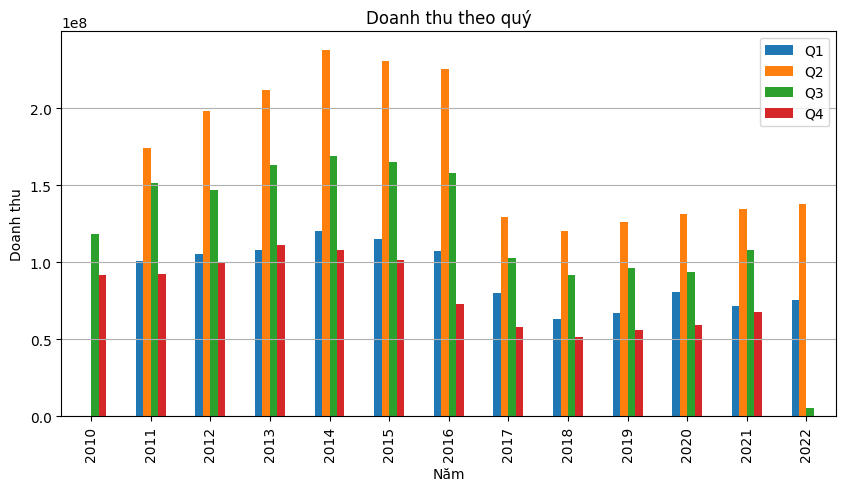

In [187]:
df["Quarter"] = df["Date"].dt.quarter

df_quarterly = df.groupby(["Year", "Quarter"])["Revenue"].sum().unstack()

df_quarterly.plot(kind="bar", figsize=(10, 5))
plt.title("Doanh thu theo quý")
plt.xlabel("Năm")
plt.ylabel("Doanh thu")
plt.legend(["Q1", "Q2", "Q3", "Q4"])
plt.grid(axis="y")
plt.show()


##6.Biến động doanh thu qua các năm: Giai đoạn 2016-2017 ghi nhận sự sụt giảm mạnh trong doanh số bán hàng, có thể bị ảnh hưởng bởi một số chính sách dưới thời Tổng thống Trump.

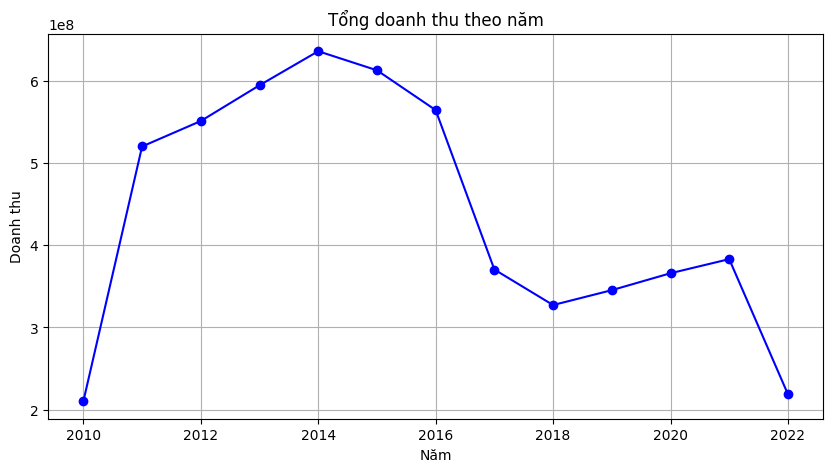

In [188]:
import matplotlib.pyplot as plt

df_yearly = df.groupby("Year")["Revenue"].sum()

plt.figure(figsize=(10, 5))
plt.plot(df_yearly.index, df_yearly.values, marker="o", linestyle="-", color="b")
plt.title("Tổng doanh thu theo năm")
plt.xlabel("Năm")
plt.ylabel("Doanh thu")
plt.grid()
plt.show()


##7.Xu hướng thay đổi doanh thu, lượng bán : Xu hướng tăng trưởng cao vào tháng 4 và thấp nhất vào tháng 12.

In [189]:
# Biểu đồ 1: Monthly Sales (Doanh thu từng tháng)
fig1 = go.Figure()
fig1.add_trace(go.Scatter(
    x=df_monthly_revenue['Year-Month'],
    y=df_monthly_revenue['Revenue'],
    mode='lines+markers',
    name='Monthly Sales'
))
fig1.update_layout(
    title="Monthly Sales",
    xaxis_title="Date",
    yaxis_title="Revenue"
)

fig1.show()


In [190]:
# Biểu đồ 2: Monthly Sales Difference (Chênh lệch doanh thu giữa các tháng)
fig2 = go.Figure()
fig2.add_trace(go.Scatter(
    x=df_monthly_revenue['Year-Month'],
    y=df_monthly_revenue['diff'],
    mode='lines+markers',
    name='Monthly Revenue Difference'
))
fig2.update_layout(
    title="Monthly Sales Difference",
    xaxis_title="Date",
    yaxis_title="Revenue Difference"
)

fig2.show()

##8.Xu hướng giá và sản lượng: Giá sản phẩm có xu hướng tăng theo thời gian, sản lượng bán ra giảm dần.

### 8.1.Sự sụt giảm bất thường vào tháng cuối cùng: Tháng 07/2022 ghi nhận mức giảm đáng kể trong số lượng đơn vị bán ra.









In [191]:
# Giả sử df là DataFrame của bạn
df['Date'] = pd.to_datetime(df['Date'])
df['Revenue'] = pd.to_numeric(df['Revenue'])
df['COGS'] = pd.to_numeric(df['COGS'])

# Gộp dữ liệu theo tháng
df['YearMonth'] = df['Date'].dt.to_period('M')

# Chỉ tính tổng cho các cột cụ thể
df_monthly = df.groupby('YearMonth').agg({
    'Units': 'sum',
    'Revenue': 'sum',
    'COGS': 'sum'
}).reset_index()

print(df_monthly)
df_monthly1= df_monthly
df_monthly = df_monthly.drop('YearMonth', axis=1) # axis=1 specifies that we are dropping a column
df_monthly1['Price_per_Unit'] = df_monthly1['Revenue'] / df_monthly1['Units']
plt.figure(figsize=(12, 5))
df_monthly1['YearMonth'] = df_monthly1['YearMonth'].astype(str)



    YearMonth  Units      Revenue         COGS
0     2010-07   7451  36351952.56  28943672.20
1     2010-08   9983  47303856.18  38329232.87
2     2010-09   7303  34881766.29  28370974.40
3     2010-10   6622  32132565.36  26288755.28
4     2010-11   6251  27462497.58  22459930.37
..        ...    ...          ...          ...
140   2022-03   4242  33834812.76  29623220.80
141   2022-04   5880  46567715.67  40824483.42
142   2022-05   5827  46384317.00  40643827.92
143   2022-06   5635  44984175.39  39574064.12
144   2022-07    705   5274388.35   4605905.36

[145 rows x 4 columns]


<Figure size 1200x500 with 0 Axes>

In [192]:
# Tạo biểu đồ với Plotly
plot_data = [
    go.Scatter(
        x=df_monthly1['YearMonth'],
        y=df_monthly1['Price_per_Unit'],
        mode='lines+markers',
        name='Price per Unit'
    )
]

plot_layout = go.Layout(
    title='Monthly Price per Unit Over Time',
    xaxis_title='Year-Month',
    yaxis_title='Price per Unit',
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)



In [193]:
plot_data = [
    go.Scatter(
        x=df_monthly1['YearMonth'],
        y=df_monthly1['Units'],
        mode='lines+markers',
        name='Price per Unit'
    )
]

plot_layout = go.Layout(
    title='Unit Over Time',
    xaxis_title='Year-Month',
    yaxis_title='Unit',

)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


##9.Ảnh hưởng của COGS và số Unit bán ra đối với doanh thu

###9.1.Trọng số COGS: 0.988627 vs Trọng số Unit: 0.011373

In [194]:
import pandas as pd
import statsmodels.api as sm

df_monthly = df.groupby('YearMonth').agg({
    'Units': 'sum',
    'Revenue': 'sum',
    'COGS': 'sum'
}).reset_index()

# Xác định biến độc lập (X) và biến phụ thuộc (y)
X = df_monthly[['Units', 'COGS']]
y = df_monthly['Revenue']

from sklearn.ensemble import RandomForestRegressor

# Huấn luyện mô hình Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Hiển thị độ quan trọng của từng feature
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
print(feature_importance.sort_values(ascending=False))


COGS     0.988627
Units    0.011373
dtype: float64


###9.2.Biên độ lợi nhuận có xu hướng giảm

In [195]:
plot_data = [
    go.Scatter(
        x=df_monthly1['YearMonth'],
        y=df_monthly1['COGS'],
        mode='lines+markers',
        name='Price per Unit',
        line=dict(color='blue')  # Màu xanh
    ),
    go.Scatter(
        x=df_monthly1['YearMonth'],
        y=df_monthly1['Revenue'],
        mode='lines+markers',
        name='Revenue',
        line=dict(color='red')  # Màu đỏ
    )
]

plot_layout = go.Layout(
    title='COGS and Revenue Over Time',
    xaxis_title='Year-Month',
    yaxis_title='Value',
    legend=dict(x=0, y=1),  # Điều chỉnh vị trí chú thích
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


# **Data Train-Test**

In [196]:
df_supervised = df_monthly_revenue.drop(['diff'],axis=1)
for inc in range(1,13):
    field_name = 'Revenue_' + str(inc)
    df_supervised[field_name] = df_supervised['Revenue'].shift(inc)
#drop null values
df_supervised = df_supervised.dropna().reset_index(drop=True)


In [197]:
df_supervised

,Year-Month,Revenue,Revenue_1,Revenue_2,Revenue_3,Revenue_4,Revenue_5,Revenue_6,Revenue_7,Revenue_8,Revenue_9,Revenue_10,Revenue_11,Revenue_12
0,2011-07-01,54517927.59,57673237.23,56407506.12,60289240.41,43099232.40,32564953.89,25395054.30,32303821.41,27462497.58,32132565.36,34881766.29,47303856.18,36351952.56
1,2011-08-01,56877280.74,54517927.59,57673237.23,56407506.12,60289240.41,43099232.40,32564953.89,25395054.30,32303821.41,27462497.58,32132565.36,34881766.29,47303856.18
2,2011-09-01,40379172.12,56877280.74,54517927.59,57673237.23,56407506.12,60289240.41,43099232.40,32564953.89,25395054.30,32303821.41,27462497.58,32132565.36,34881766.29
3,2011-10-01,32780867.49,40379172.12,56877280.74,54517927.59,57673237.23,56407506.12,60289240.41,43099232.40,32564953.89,25395054.30,32303821.41,27462497.58,32132565.36
4,2011-11-01,25646847.66,32780867.49,40379172.12,56877280.74,54517927.59,57673237.23,56407506.12,60289240.41,43099232.40,32564953.89,25395054.30,32303821.41,27462497.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2022-03-01,33834812.76,23949100.98,17959235.49,19926137.70,20693577.24,27373566.78,32441185.98,43491476.70,32444287.47,48282093.72,44448474.42,42042708.54,32252658.48
129,2022-04-01,46567715.67,33834812.76,23949100.98,17959235.49,19926137.70,20693577.24,27373566.78,32441185.98,43491476.70,32444287.47,48282093.72,44448474.42,42042708.54
130,2022-05-01,46384317.00,46567715.67,33834812.76,23949100.98,17959235.49,19926137.70,20693577.24,27373566.78,32441185.98,43491476.70,32444287.47,48282093.72,44448474.42
131,2022-06-01,44984175.39,46384317.00,46567715.67,33834812.76,23949100.98,17959235.49,19926137.70,20693577.24,27373566.78,32441185.98,43491476.70,32444287.47,48282093.72


In [198]:
#import MinMaxScaler and create a new dataframe for LSTM model
from sklearn.preprocessing import MinMaxScaler
df_supervised['Month_Index'] = df_supervised['Year-Month'].dt.month - 1
df_model = df_supervised.drop(['Year-Month'],axis=1)

In [199]:
train_set, test_set = df_model[0:-19], df_model[-19:]

train_revenue = train_set.drop(columns=['Month_Index']).values
test_revenue = test_set.drop(columns=['Month_Index']).values

# Chuyển Month_Index thành array riêng
train_month = train_set['Month_Index'].values
test_month = test_set['Month_Index'].values

# Chuẩn hóa doanh thu (Revenue)
scaler = MinMaxScaler(feature_range=(-1, 1))
train_revenue = scaler.fit_transform(train_revenue)
test_revenue = scaler.transform(test_revenue)

X_train, y_train = train_revenue[:, 1:], train_revenue[:, 0:1]
X_test, y_test = test_revenue[:, 1:], test_revenue[:, 0:1]


In [200]:
X_train

array([[ 0.19384725,  0.15937526,  0.26509369, ..., -0.42687493,
        -0.08856123, -0.38683463],
       [ 0.10791288,  0.19384725,  0.15937526, ..., -0.50174899,
        -0.42687493, -0.08856123],
       [ 0.1721695 ,  0.10791288,  0.19384725, ..., -0.62893756,
        -0.50174899, -0.42687493],
       ...,
       [-0.64639392, -0.40227675, -0.52138493, ..., -0.82656819,
        -0.92335639, -0.85090848],
       [-0.75400757, -0.64639392, -0.40227675, ..., -0.90467766,
        -0.82656819, -0.92335639],
       [-0.91585183, -0.75400757, -0.64639392, ..., -0.6861548 ,
        -0.90467766, -0.82656819]])

In [201]:
X_train.shape

(114, 12)

In [202]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [203]:
import numpy as np
from sklearn.metrics import mean_squared_error

def calculate_rmse(actual, predicted):
    """
    Tính RMSE giữa giá trị thực tế và giá trị dự đoán.

    Parameters:
    - actual: Mảng hoặc danh sách chứa giá trị thực tế.
    - predicted: Mảng hoặc danh sách chứa giá trị dự đoán.

    Returns:
    - RMSE: Giá trị lỗi RMSE.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    return rmse


In [204]:
import numpy as np
from sklearn.metrics import mean_squared_error

def predict_and_inverse_transform(model, X_test, test_month, scaler, train_revenue):
    """
    Hàm thực hiện dự đoán tuần tự với mô hình và chuyển đổi ngược giá trị dự đoán về đơn vị gốc.

    Parameters:
    - model: Mô hình đã được huấn luyện.
    - X_test: Dữ liệu đầu vào để dự đoán.
    - test_month: Chỉ số tháng tương ứng với X_test.
    - scaler: Bộ MinMaxScaler đã được fit với dữ liệu huấn luyện.
    - train_revenue: Dữ liệu doanh thu huấn luyện để xác định số lượng features.

    Returns:
    - predictions: Danh sách giá trị dự đoán (đã scale).
    - predictions_inverted: Danh sách giá trị dự đoán sau khi inverse transform.
    """

    predictions = []
    predictions_inverted = []  # Danh sách lưu giá trị đã inverse transform
    current_input = X_test[0]  # Bắt đầu với input đầu tiên

    for i in range(len(X_test)):
        # Dự đoán giá trị tiếp theo
        y_pred = model.predict([test_month[i].reshape(1, 1), current_input.reshape(1, 1, -1)], batch_size=1)
        predictions.append(y_pred[0][0])  # Lưu giá trị đã scale

        # 🔄 **Inverse transform giá trị dự đoán**
        y_pred_inv = scaler.inverse_transform(
            np.concatenate([[[y_pred[0][0]]], np.zeros((1, train_revenue.shape[1] - 1), dtype=np.float32)], axis=1)
        )[:, 0]  # Chỉ lấy cột doanh thu

        predictions_inverted.append(y_pred_inv[0])  # Lưu giá trị gốc

        # Cập nhật input cho bước tiếp theo
        current_input = np.roll(current_input, -1).astype(float)
        current_input[0, -1] = float(y_pred[0][0])  # Thay giá trị cuối cùng bằng dự đoán hiện tại (vẫn giữ giá trị scale)

    return np.array(predictions), np.array(predictions_inverted)


In [205]:
import pandas as pd

def create_prediction_dataframe(df_monthly_revenue, pred_test_set_inverted):
    """
    Tạo DataFrame chứa kết quả dự đoán và giá trị thực tế.

    Parameters:
    - df_monthly_revenue: DataFrame chứa doanh thu thực tế theo tháng.
    - pred_test_set_inverted: Danh sách các giá trị dự đoán đã được inverse transform.

    Returns:
    - df_result: DataFrame chứa cột 'date', 'pred_value' (dự đoán) và 'act_value' (thực tế).
    """

    # Lấy danh sách 20 tháng cuối cùng từ cột 'Year-Month' và 'Revenue'
    sales_dates = list(df_monthly_revenue['Year-Month'][-20:])
    act_sales = list(df_monthly_revenue['Revenue'][-19:])  # Thực tế chỉ có 19 giá trị thực tế để so sánh

    # Tạo danh sách kết quả dự đoán
    result_list = []
    for index in range(len(pred_test_set_inverted)):
        result_dict = {
            'date': sales_dates[index + 1],  # Ngày của dự đoán (dịch một bước so với thực tế)
            'pred_value': int(pred_test_set_inverted[index])  # Làm tròn về kiểu int
        }
        result_list.append(result_dict)

    # Chuyển sang DataFrame
    df_result = pd.DataFrame(result_list)

    # Thêm cột giá trị thực tế
    df_result['act_value'] = act_sales

    return df_result


In [206]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyoff

def plot_predictions(df_monthly_revenue, df_result, text='-LSTM'):
    """
    Gộp dữ liệu thực tế với kết quả dự đoán, sau đó vẽ biểu đồ so sánh.

    Parameters:
    - df_monthly_revenue: DataFrame chứa doanh thu thực tế theo tháng.
    - df_result: DataFrame chứa dự đoán ('date', 'pred_value').

    Returns:
    - fig: Đối tượng Figure của Plotly để trực quan hóa kết quả.
    """

    # Gộp dữ liệu thực tế với dự đoán
    df_sales_pred = pd.merge(df_monthly_revenue, df_result, left_on='Year-Month', right_on='date', how='left')

    # Vẽ biểu đồ so sánh giữa giá trị thực tế và dự đoán
    plot_data = [
        go.Scatter(
            x=df_sales_pred['Year-Month'],
            y=df_sales_pred['Revenue'],
            mode='lines+markers',
            name='Actual Revenue'
        ),
        go.Scatter(
            x=df_sales_pred['Year-Month'],
            y=df_sales_pred['pred_value'],
            mode='lines+markers',
            name='Predicted Revenue'
        )
    ]

    plot_layout = go.Layout(
        title='Monthly Revenue Prediction'+ text ,
        xaxis_title='Year-Month',
        yaxis_title='Revenue',
        legend=dict(x=0, y=1),
    )

    fig = go.Figure(data=plot_data, layout=plot_layout)
    pyoff.iplot(fig)

    return fig


In [207]:
def forecast_next_12_months_continuous(model, predictions_lstm, test_month, scaler, train_revenue):
    """
    Dự báo 12 tháng tiếp theo bằng cách dùng chính dự đoán LSTM làm input.

    Parameters:
    - model: Mô hình LSTM đã huấn luyện.
    - predictions_lstm: Dự đoán của tập test.
    - test_month: Chỉ số tháng tương ứng với tập test (mảng 1D).
    - scaler: Bộ MinMaxScaler đã được fit.
    - train_revenue: Dữ liệu huấn luyện để xác định số lượng features.

    Returns:
    - future_predictions_scaled: Dự báo đã scale.
    - future_predictions_inverted: Dự báo sau khi inverse transform về đơn vị gốc.
    """

    future_predictions_scaled = []
    future_predictions_inverted = []

    # Lấy tháng cuối cùng của tập test
    last_month = test_month[-1]  # test_month là mảng 1D

    # **Lấy 12 tháng gần nhất làm input đầu tiên (sửa lỗi shape)**
    current_input = predictions_lstm[-12:].reshape(1, 1, 12)
    for i in range(12):  # Dự đoán 12 tháng tiếp theo
        last_month = (last_month + 1) % 12  # Giữ giá trị tháng trong khoảng 0-11

        # Dự đoán giá trị tiếp theo
        y_pred = model.predict([np.array([[last_month]]), current_input], batch_size=1)
        future_predictions_scaled.append(y_pred[0][0])

        # Inverse transform để đưa về đơn vị gốc
        y_pred_inv = scaler.inverse_transform(
            np.concatenate([[[y_pred[0][0]]], np.zeros((1, train_revenue.shape[1] - 1), dtype=np.float32)], axis=1)
        )[:, 0]

        future_predictions_inverted.append(y_pred_inv[0])

        # **Cập nhật input bằng cách loại bỏ giá trị cũ nhất và thêm giá trị mới nhất**
        current_input = np.roll(current_input, -1, axis=2)
        current_input[0, 0, -1] = float(y_pred[0][0])

    return np.array(future_predictions_scaled), np.array(future_predictions_inverted)


# **LSTM**

##Mô hình

In [208]:
import numpy as np
import random
import tensorflow as tf

# Đặt random seed
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

from tensorflow.keras.layers import Embedding, Add, Flatten, Reshape, LSTM, Dense, Lambda
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Input riêng biệt cho Month_Index và Revenue
input_month = Input(batch_shape=(1, 1))
input_revenue = Input(shape=(1, X_train.shape[2]))
# Lớp Embedding cho Month_Index
embedding = Embedding(input_dim=12, output_dim=12)(input_month)
embedding = tf.keras.activations.tanh(embedding)
embedding_reshaped = Reshape((1, 12))(embedding)

# Thực hiện phép cộng (Add)
added = Add()([input_revenue, embedding_reshaped])

# Đưa vào LSTM
lstm_out = LSTM(64, stateful=True)(added)
output = Dense(1)(lstm_out)

# Xây dựng mô hình
model_lstm = Model(inputs=[input_month, input_revenue], outputs=output)

import tensorflow.keras.backend as K

def smape_loss(y_true, y_pred):
    """
    Tính SMAPE loss (Symmetric Mean Absolute Percentage Error).
    SMAPE = (2 / n) * sum(|y_true - y_pred| / (|y_true| + |y_pred| + epsilon))
    """
    numerator = K.abs(y_true - y_pred)
    denominator = (K.abs(y_true) + K.abs(y_pred)) / 2.0 + K.epsilon()
    return K.mean(numerator / denominator)

def custom_loss(y_true, y_pred):
    """
    Hàm loss kết hợp giữa MSE và SMAPE.
    """
    mse = K.mean(K.square(y_true - y_pred))
    smape = smape_loss(y_true, y_pred)
    return mse + 0.2 * smape

model_lstm.compile(loss=custom_loss, optimizer=Adam(learning_rate=0.004))

# Huấn luyện
model_lstm.fit(
    [train_month.reshape(-1, 1), X_train],
    y_train,
    epochs=150,
    batch_size=1,
    verbose=1,
    shuffle=False
)


Epoch 1/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3878
Epoch 2/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2224
Epoch 3/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2241
Epoch 4/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1974
Epoch 5/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1744
Epoch 6/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1571
Epoch 7/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1555
Epoch 8/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1432
Epoch 9/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1391
Epoch 10/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1587
Epoch 11/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1210
Epoch 12/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1293
Epoch 13/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0988
Epoch 14/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1040
Epoch 15/150
114/114 ━━━━━━━━━━━━━━━━━━━━ 1

##Dự đoán và Đánh giá

In [209]:
predictions_lstm, predictions_inverted_lstm = predict_and_inverse_transform(model_lstm, X_test, test_month, scaler, train_revenue)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [210]:
df_result_lstm = create_prediction_dataframe(df_monthly_revenue,  predictions_inverted_lstm)


In [211]:
df_result_lstm

,date,pred_value,act_value
0,2021-01-01,16674600,17404126.74
1,2021-02-01,24443894,22244195.61
2,2021-03-01,33599024,32252658.48
3,2021-04-01,36499036,42042708.54
4,2021-05-01,44215948,44448474.42
5,2021-06-01,43659036,48282093.72
6,2021-07-01,33155288,32444287.47
7,2021-08-01,43608608,43491476.70
8,2021-09-01,25988832,32441185.98
9,2021-10-01,24742930,27373566.78


In [212]:
fig_lstm = plot_predictions(df_monthly_revenue, df_result_lstm, text='-LSTM')


In [213]:
print('Root Mean Squared Error:',calculate_rmse(df_result_lstm['act_value'], df_result_lstm['pred_value']))

Root Mean Squared Error: 6115502.874301662


In [214]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(df_result_lstm['act_value'], df_result_lstm['pred_value']))
mae = mean_absolute_error(df_result_lstm['act_value'], df_result_lstm['pred_value'])
mape = np.mean(np.abs((df_result_lstm['act_value']-df_result_lstm['pred_value']) / df_result_lstm['act_value'])) * 100
r2 = r2_score(df_result_lstm['act_value'], df_result_lstm['pred_value'])

print(f'''
Đánh giá mô hình cho LSTM:
- RMSE: {rmse:.2f}
- MAE: {mae:.2f}
- MAPE: {mape:.2f}%
- R²: {r2:.2f}
''')


Đánh giá mô hình cho LSTM:
- RMSE: 6115502.87
- MAE: 3447517.03
- MAPE: 30.24%
- R²: 0.75



##Dự đoán doanh thu một năm sau

In [215]:
future_predictions_lstm, future_predictions_inverted_lstm = forecast_next_12_months_continuous(
    model_lstm, predictions_lstm, test_month, scaler, train_revenue
)

df_future_lstm = pd.DataFrame({
    'date': pd.date_range(start=df_result_lstm['date'].iloc[-1], periods=13, freq='ME')[1:],  # Tạo 12 tháng tiếp theo
    'pred_value': future_predictions_inverted_lstm
})

df_full_result_lstm = pd.concat([df_result_lstm, df_future_lstm], ignore_index=True)



trace_actual = go.Scatter(
    x=df_monthly_revenue['Year-Month'],
    y=df_monthly_revenue['Revenue'],
    mode='lines+markers',
    name='Actual Revenue'
)

trace_pred_lstm = go.Scatter(
    x=df_full_result_lstm['date'],
    y=df_full_result_lstm['pred_value'],
    mode='lines+markers',
    name='Predicted Revenue'
)

plot_layout_lstm= go.Layout(
    title='Revenue Prediction (Including Future 12 Months)- LSTM',
    xaxis_title='Year-Month',
    yaxis_title='Revenue',
    legend=dict(x=0, y=1),
)
fig_lstm = go.Figure(data=[trace_actual, trace_pred_lstm], layout=plot_layout_lstm)
pyoff.iplot(fig_lstm)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


# **Transformer**

##Mô hình

In [216]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.layers import (Embedding, Dense, Reshape, Add, MultiHeadAttention,
                                     LayerNormalization, Dropout, Input, Flatten)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Đặt random seed
SEED = 42
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Input cho Month_Index và Revenue
input_month = Input(shape=(1,))
input_revenue = Input(shape=(1, X_train.shape[2]))

# Lớp Embedding cho Month_Index
embedding = Embedding(input_dim=12, output_dim=12)(input_month)
norm_layer = LayerNormalization()(embedding)
embedding_reshaped = Reshape((1, 12))(norm_layer)

# Kết hợp input với embedding
added = Add()([input_revenue, embedding_reshaped])

# Transformer Block
def transformer_block(inputs, num_heads=8, ff_dim=32, dropout_rate=0.1):
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=inputs.shape[-1])(inputs, inputs)
    attention_output = Dropout(dropout_rate)(attention_output)
    attention_output = LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    ff_output = Dense(ff_dim, activation='gelu')(attention_output)
    ff_output = Dense(inputs.shape[-1])(ff_output)
    ff_output = Dropout(dropout_rate)(ff_output)
    return LayerNormalization(epsilon=1e-6)(attention_output + ff_output)

# Áp dụng Transformer block
transformer_out = transformer_block(added)

# Dense Layer để lấy đầu ra
output = Dense(1)(Flatten()(transformer_out))

# Xây dựng mô hình
model_transformer = Model(inputs=[input_month, input_revenue], outputs=output)
model_transformer.compile(loss=custom_loss, optimizer=Adam(learning_rate=0.001))

# Huấn luyện
model_transformer.fit(
    [train_month.reshape(-1, 1), X_train],
    y_train,
    epochs=500,
    batch_size=1,
    verbose=1,
    shuffle=False
)

Epoch 1/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 2.4467
Epoch 2/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4274
Epoch 3/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3220
Epoch 4/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2710
Epoch 5/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3104
Epoch 6/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2338
Epoch 7/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2153
Epoch 8/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2087
Epoch 9/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2314
Epoch 10/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2409
Epoch 11/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2719
Epoch 12/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1742
Epoch 13/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2097
Epoch 14/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2609
Epoch 15/500
114/114 ━━━━━━━━━━━━━━━━━━━━ 1

##Dự đoán và đánh giá

In [217]:
predictions_trans, predictions_inverted_trans = predict_and_inverse_transform(model_transformer, X_test, test_month, scaler, train_revenue)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [218]:
df_result_trans = create_prediction_dataframe(df_monthly_revenue,  predictions_inverted_trans)

In [219]:
df_result_trans

,date,pred_value,act_value
0,2021-01-01,14554339,17404126.74
1,2021-02-01,22830122,22244195.61
2,2021-03-01,32257088,32252658.48
3,2021-04-01,47708236,42042708.54
4,2021-05-01,42013892,44448474.42
5,2021-06-01,46889056,48282093.72
6,2021-07-01,30560524,32444287.47
7,2021-08-01,40072800,43491476.70
8,2021-09-01,27825014,32441185.98
9,2021-10-01,26716650,27373566.78


In [220]:
fig_trans = plot_predictions(df_monthly_revenue, df_result_trans,text='-Transformer')


In [221]:
print('Root Mean Squared Error:',calculate_rmse(df_result_trans['act_value'], df_result_trans['pred_value']))

Root Mean Squared Error: 6490637.541529246


In [222]:
rmse = np.sqrt(mean_squared_error(df_result_trans['act_value'], df_result_trans['pred_value']))
mae = mean_absolute_error(df_result_trans['act_value'], df_result_trans['pred_value'])
mape = np.mean(np.abs((df_result_trans['act_value']-df_result_trans['pred_value']) / df_result_trans['act_value'])) * 100
r2 = r2_score(df_result_trans['act_value'], df_result_trans['pred_value'])


print(f'''
Đánh giá mô hình cho Transformer:
- RMSE: {rmse:.2f}
- MAE: {mae:.2f}
- MAPE: {mape:.2f}%
- R²: {r2:.2f}
''')


Đánh giá mô hình cho Transformer:
- RMSE: 6490637.54
- MAE: 3951829.59
- MAPE: 31.93%
- R²: 0.72



##Dự đoán doanh thu một năm sau

In [223]:
future_predictions_trans, future_predictions_inverted_trans = forecast_next_12_months_continuous(
    model_transformer, predictions_trans, test_month, scaler, train_revenue
)

df_future_trans = pd.DataFrame({
    'date': pd.date_range(start=df_result_trans['date'].iloc[-1], periods=13, freq='ME')[1:],  # Tạo 12 tháng tiếp theo
    'pred_value': future_predictions_inverted_trans
})

df_full_result_trans = pd.concat([df_result_trans, df_future_trans], ignore_index=True)

# Vẽ dữ liệu thực tế
trace_actual = go.Scatter(
    x=df_monthly_revenue['Year-Month'],
    y=df_monthly_revenue['Revenue'],
    mode='lines+markers',
    name='Actual Revenue'
)

# Vẽ dự đoán hiện tại
trace_pred_trans = go.Scatter(
    x=df_full_result_trans['date'],
    y=df_full_result_trans['pred_value'],
    mode='lines+markers',
    name='Predicted Revenue'
)


# Thiết lập layout
plot_layout_trans = go.Layout(
    title='Revenue Prediction (Including Future 12 Months)-Transformer',
    xaxis_title='Year-Month',
    yaxis_title='Revenue',
    legend=dict(x=0, y=1),
)

# Tạo Figure và vẽ
fig_trans = go.Figure(data=[trace_actual, trace_pred_trans], layout=plot_layout_trans)
pyoff.iplot(fig_trans)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


# **SARIMA**

In [224]:
!pip install pmdarima
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [225]:
def adf_test(series, title=''):
    print(f'ADF Test cho {title}')
    try:
        result = adfuller(series.dropna())
        labels = ['ADF Statistic', 'p-value', '#Lags', 'Số quan sát']
        out = pd.Series(result[0:4], index=labels)

        for key, val in result[4].items():
            out[f'Critical Value ({key})'] = val

        print(out.to_string())
        print('Kết luận: Dữ liệu {} dừng\n'.format('KHÔNG' if result[1] > 0.05 else ''))
        return result[1]
    except Exception as e:
        print(f"Lỗi khi thực hiện ADF test: {e}")
        return None
# Chạy hàm
adf_test(df_monthly_revenue['Revenue'])

ADF Test cho 
ADF Statistic            -0.440097
p-value                   0.903186
#Lags                    12.000000
Số quan sát             132.000000
Critical Value (1%)      -3.480888
Critical Value (5%)      -2.883697
Critical Value (10%)     -2.578586
Kết luận: Dữ liệu KHÔNG dừng



0.9031856181446483

In [226]:
def make_stationary(series, max_diff=2):
    print(f"\nXử lý làm dừng cho {series.name}:")
    original_series = series.copy()

    for d in range(1, max_diff+1):
        diff = original_series.diff(d).dropna()
        p_value = adf_test(diff, f'Sai phân bậc {d}')
        if p_value is not None and p_value < 0.05:
            print(f"Đã đạt tính dừng với sai phân bậc {d}")
            return diff, d

    print("Không thể làm dừng với sai phân <= 2")
    return original_series, 0

revenue_diff, d_revenue = make_stationary(df_monthly_revenue['Revenue'])


Xử lý làm dừng cho Revenue:
ADF Test cho Sai phân bậc 1
ADF Statistic            -4.000802
p-value                   0.001406
#Lags                    11.000000
Số quan sát             132.000000
Critical Value (1%)      -3.480888
Critical Value (5%)      -2.883697
Critical Value (10%)     -2.578586
Kết luận: Dữ liệu  dừng

Đã đạt tính dừng với sai phân bậc 1


Phân tích ACF/PACF cho doanh thu:


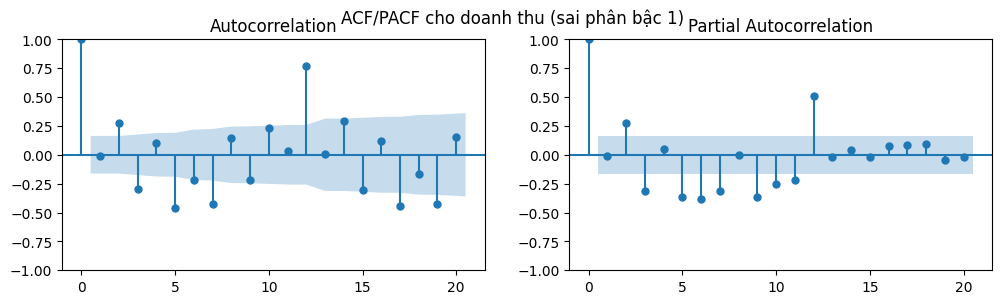

In [227]:
# 5. Xác định tham số ARIMA qua ACF/PACF (giới hạn lại số lượng lag)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_correlations(series, title):
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))
    lags = min(20, len(series)//2 - 1)
    plot_acf(series, ax=axes[0], lags=lags)
    plot_pacf(series, ax=axes[1], lags=lags, method='ywm')
    fig.suptitle(title)
    plt.show()

print("Phân tích ACF/PACF cho doanh thu:")
plot_correlations(revenue_diff, 'ACF/PACF cho doanh thu (sai phân bậc 1)')

In [228]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 3️⃣ Tìm tham số tốt nhất cho SARIMA
def find_best_sarima(series):
    try:
        model = auto_arima(
            series,
            seasonal=True,        # Bật chế độ thời vụ
            m=12,                 # Chu kỳ mùa vụ (12 tháng)
            stepwise=True,
            suppress_warnings=True,
            error_action='ignore',
            max_order=8,
            max_p=3, max_q=3,      # Giới hạn tham số AR và MA
            max_P=2, max_Q=2,      # Giới hạn tham số AR và MA theo mùa vụ
            information_criterion='aic',
            trace=True  # Hiển thị quá trình tìm kiếm
        )
        print(model.summary())
        return model.order, model.seasonal_order
    except Exception as e:
        print(f"Lỗi khi tìm SARIMA: {e}")
        return (0, 0, 0), (0, 0, 0, 0)

# Tìm tham số tối ưu
best_order, best_seasonal_order = find_best_sarima(df_monthly_revenue['Revenue'][:-19])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=4340.180, Time=3.55 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4419.467, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=4350.753, Time=0.38 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=4370.345, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4417.488, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=4354.978, Time=0.57 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=4338.549, Time=0.53 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=4392.074, Time=0.23 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=4340.217, Time=1.50 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=4342.178, Time=2.23 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=4339.644, Time=0.36 sec
 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=4338.857, Time=0.34 sec
 ARIMA(3,1,2)(1,0,0)[12] intercept   : AIC=4336.995, Time=0.75 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=4376.693, Time=0.24 sec
 ARIMA(3,1,2)(2,0,0

In [229]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_sarima(series, order, seasonal_order, var_name, test_size=19):
    try:
        # Chia dữ liệu train/test
        train = series[:-test_size]
        test = series[-test_size:]

        # Huấn luyện mô hình SARIMA
        model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
        model_fit = model.fit(disp=False)

        # Dự báo
        forecast = model_fit.get_forecast(steps=test_size).predicted_mean

        # Kiểm tra dự báo có NaN không
        if forecast.isna().sum() > 0:
            raise ValueError("Dự báo chứa giá trị NaN, cần kiểm tra dữ liệu đầu vào hoặc điều chỉnh mô hình.")

        # Đánh giá kết quả
        rmse = np.sqrt(mean_squared_error(test, forecast))
        mae = mean_absolute_error(test, forecast)
        mape = np.mean(np.abs((test - forecast) / test)) * 100
        r2 = r2_score(test, forecast)

        # Chuẩn bị dataframe kết quả dự báo
        df_result = pd.DataFrame({'date': test.index, 'pred_value': forecast.values})

        # Vẽ biểu đồ so sánh thực tế & dự báo
        plot_predictions(pd.DataFrame({'Year-Month': series.index, 'Revenue': series.values}), df_result, text='-SARIMA')

        print(f'''
Đánh giá mô hình SARIMA cho {var_name}:
- RMSE: {rmse:.2f}
- MAE: {mae:.2f}
- MAPE: {mape:.2f}%
- R²: {r2:.2f}
''')

        return model_fit

    except Exception as e:
        print(f"Lỗi khi đánh giá mô hình: {e}")
        return None

# Đánh giá mô hình SARIMA
model_sarima = evaluate_sarima(df_monthly_revenue['Revenue'], best_order, best_seasonal_order, 'Doanh thu')



Đánh giá mô hình SARIMA cho Doanh thu:
- RMSE: 7328170.25
- MAE: 4789681.21
- MAPE: 36.10%
- R²: 0.64



In [230]:
import plotly.graph_objs as go
import plotly.offline as pyoff

# Xác định số lượng điểm dữ liệu
test_size = 19
future_size = 12

# Dự báo cho cả test + future
forecast_total = model_sarima.get_forecast(steps=test_size + future_size).predicted_mean

# Tách dữ liệu dự báo
forecast_test = forecast_total[:test_size]  # Phần dự báo tập test
forecast_future = forecast_total[test_size:]  # Phần dự báo tương lai

# Chỉ số thời gian
# Giả sử df_monthly_revenue có cột 'Year-Month' dạng datetime
test_dates = df_monthly_revenue['Year-Month'][-test_size:]  # Ngày của tập test

# Xác định ngày cuối cùng trong test
last_test_date = test_dates.iloc[-1]

# Tạo future_dates với tần suất hàng tháng ('M')
future_dates = pd.date_range(start=last_test_date, periods=future_size + 1, freq='M')[1:]

total_dates = pd.concat([pd.Series(test_dates), pd.Series(future_dates)]).reset_index(drop=True)

# Vẽ biểu đồ
trace_actual = go.Scatter(
    x=df_monthly_revenue['Year-Month'],
    y=df_monthly_revenue['Revenue'],
    mode='lines+markers',
    name='Actual Revenue'
)

trace_pred_future = go.Scatter(
    x=total_dates,
    y=forecast_total.values,
    mode='lines+markers',
    name='Predicted',
)

layout = go.Layout(
    title='Revenue Prediction (Including Future 12 Months)-SARIMA',
    xaxis_title='Date',
    yaxis_title='Revenue',
    legend=dict(x=0, y=1),
)

fig = go.Figure(data=[trace_actual, trace_pred_future], layout=layout)
pyoff.iplot(fig)



Phân tích phần dư cho Doanh thu:
count    1.260000e+02
mean    -8.751574e+04
std      7.429590e+06
min     -2.006621e+07
25%     -3.746472e+06
50%      6.807617e+04
75%      3.413714e+06
max      3.635195e+07
dtype: float64


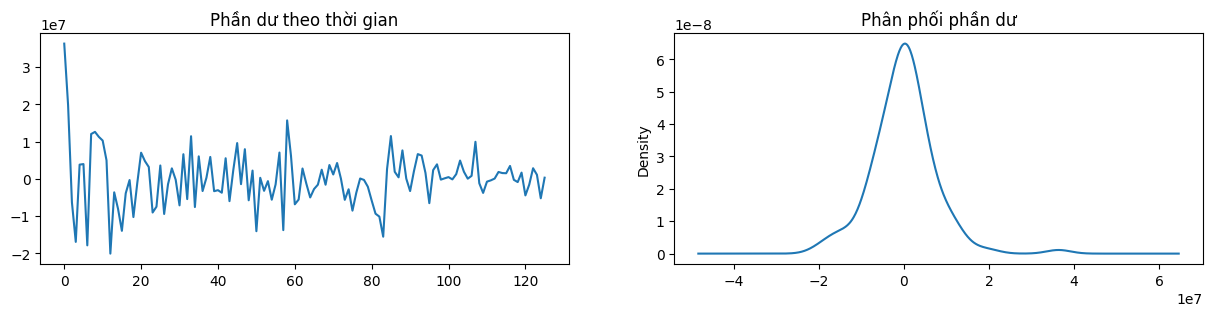

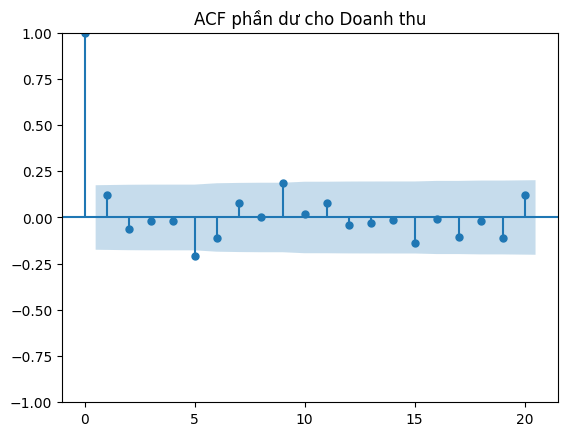

In [231]:
# 9. Phân tích phần dư
def analyze_residuals(model_fit, title):
    residuals = pd.Series(model_fit.resid, index=model_fit.model.data.row_labels)

    # Thống kê phần dư
    print(f"\nPhân tích phần dư cho {title}:")
    print(residuals.describe())

    # Biểu đồ phần dư
    fig, axes = plt.subplots(1, 2, figsize=(15, 3))
    residuals.plot(title='Phần dư theo thời gian', ax=axes[0])
    residuals.plot(kind='kde', title='Phân phối phần dư', ax=axes[1])
    plt.show()

    # ACF của phần dư
    plot_acf(residuals, lags=20)
    plt.title(f'ACF phần dư cho {title}')
    plt.show()

analyze_residuals(model_sarima, 'Doanh thu')